# Propagating Monte Carlo Error: Python3

In [64]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

# Generate Random Data

In [65]:
xvals = np.linspace(-1, 1, 11) # Project Requirements specify 20 points on -1, 1
def makeFakeData(fn):
    return fn(xvals)+np.random.normal(size=len(xvals))

Below is the funciton that dictates solution behavior

In [92]:
fn1 = lambda x: -2+3.*x 
fn2 = lambda x: 3.

In [106]:
def createDataSet(fn):
    data = []
    for index in np.arange(1000): # at least 1000 data sets
        data.append(np.polyfit(xvals,makeFakeData(fn2),2))
    return np.array(data)

fn1Data = createDataSet(fn1)
fn2Data = createDataSet(fn2)

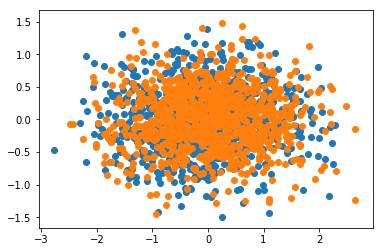

In [107]:
def scatter(data):
    plt.scatter(data[:,0], data[:,1])
scatter(fn1Data)
scatter(fn2Data)

# Distibution of Linear Fit Coefficients
The distribution of the two functions (fn1, fn2) produce different means. However, the variance of the two functions is very similar.

In [108]:
def printProp(data):
    print("Mean:", np.mean(data[:,0]))
    print("Std.:", np.std(data[:,0]))
    print("Variance:", np.var(data[:,0]))
    print("Covariance Matrix:", np.cov(data[:,0],data[:,1]))

printProp(fn1Data)
printProp(fn2Data)

Mean: -0.061100277674784945
Std.: 0.8369957980552688
Variance: 0.7005619659621762
Covariance Matrix: [[0.70126323 0.01247164]
 [0.01247164 0.22034602]]
Mean: 0.02624291956148723
Std.: 0.8556066967050551
Variance: 0.7320628194465362
Covariance Matrix: [[0.73279562 0.00855442]
 [0.00855442 0.20657106]]
